In [12]:
import sys
!{sys.executable} -m pip install nltk --quiet
!{sys.executable} -m pip install wordcloud --quiet
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords

In [13]:
df = pd.read_csv('MENTAL HEALTH.csv')
print(df.head())

/tmp/ipython-input-3527673268.py:1: DtypeWarning: Columns (3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('MENTAL HEALTH.csv')


                                               Title  \
0                            exposure does not work!   
1  Panic attack? derealization? can't go to docto...   
2                 How long can a panic attack last?!   
3                                    Stepping stones   
4  Coping with anxiety over climate change, on th...   

                                                Text Subreddit Unnamed: 3  \
0  I have struggled with social anxiety from chil...   Anxiety        NaN   
1  Back in March (I know, a while ago D:), I woke...   Anxiety        NaN   
2  I've been withdrawing from medicines lately (e...   Anxiety        NaN   
3  First time poster, long time lurker. \n\nI've ...   Anxiety        NaN   
4  Hi all,\n\nI made a throwaway account as my ma...   Anxiety        NaN   

  Unnamed: 4 Unnamed: 5 Unnamed: 6 Unnamed: 7 Unnamed: 8 Unnamed: 9  ...  \
0        NaN        NaN        NaN        NaN        NaN        NaN  ...   
1        NaN        NaN        NaN        NaN   

In [14]:
print(df.columns)

Index(['Title', 'Text', 'Subreddit', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26',
       'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30',
       'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34',
       'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38',
       'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42',
       'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46',
       'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50',
       'Unnamed: 51', 'Unnamed: 52', 'Unnamed: 53', 'Unnamed: 54',
       'Unnamed: 55', 'Unnamed: 56', 'Unnamed: 57', 'Unnamed: 58',
       'Unnamed: 59', 'Unnamed: 60', 'U

In [15]:
print("SHAPE BEFORE CLEANING: ", df.shape)

SHAPE BEFORE CLEANING:  (488738, 79)


In [16]:
df = df.loc[:, ~df.columns.str.startswith('Unnamed')]
print(df.head())

                                               Title  \
0                            exposure does not work!   
1  Panic attack? derealization? can't go to docto...   
2                 How long can a panic attack last?!   
3                                    Stepping stones   
4  Coping with anxiety over climate change, on th...   

                                                Text Subreddit  
0  I have struggled with social anxiety from chil...   Anxiety  
1  Back in March (I know, a while ago D:), I woke...   Anxiety  
2  I've been withdrawing from medicines lately (e...   Anxiety  
3  First time poster, long time lurker. \n\nI've ...   Anxiety  
4  Hi all,\n\nI made a throwaway account as my ma...   Anxiety  


In [17]:
print(df.columns)

Index(['Title', 'Text', 'Subreddit'], dtype='object')


In [18]:
print("SHAPE AFTER CLEANING: ", df.shape)

SHAPE AFTER CLEANING:  (488738, 3)


In [19]:
df['Combined'] = df['Title'].fillna('') + ' ' + df['Text'].fillna('')

In [20]:
df.head

<bound method NDFrame.head of                                                     Title  \
0                                 exposure does not work!   
1       Panic attack? derealization? can't go to docto...   
2                      How long can a panic attack last?!   
3                                         Stepping stones   
4       Coping with anxiety over climate change, on th...   
...                                                   ...   
488733                 Religion and paranoid conversation   
488734  Isn't this a little weird for being tardive dy...   
488735  Is this a symptom of schizophrenia or somethin...   
488736  Anyone seen the new Black Mirror episode Bande...   
488737   My girlfriend of over 1 year and I just broke up   

                                                     Text      Subreddit  \
0       I have struggled with social anxiety from chil...        Anxiety   
1       Back in March (I know, a while ago D:), I woke...        Anxiety   
2       I've been withdrawing from medicines lately (e...        Anxiety   
3       First time poster, long time lurker. \n\nI've ...        Anxiety   
4       Hi all,\n\nI made a throwaway account as my ma...        Anxiety   
...                                                   ...            ...   
488733  Ok! I've got a rant to make and a conversation...  schizophrenia   
488734  When I wake up, I rarely have any tics in my t...  schizophrenia   
488735  I’m not sure if this is schizophrenia (or perh...  schizophrenia   
488736  Although I don't think it was stated what Stef...  schizophrenia   
488737  It's really tough right now. We broke up due t...  schizophrenia   

                                                 Combined  
0       exposure does not work! I have struggled with ...  
1       Panic attack? derealization? can't go to docto...  
2       How long can a panic attack last?! I've been w...  
3       Stepping stones First time poster, long time l...  
4       Coping with anxiety over climate change, on th...  
...                                                   ...  
488733  Religion and paranoid conversation Ok! I've go...  
488734  Isn't this a little weird for being tardive dy...  
488735  Is this a symptom of schizophrenia or somethin...  
488736  Anyone seen the new Black Mirror episode Bande...  
488737  My girlfriend of over 1 year and I just broke ...  

[488738 rows x 4 columns]>

In [21]:
df['Combined'] = df['Combined'].str.lower()
df['Combined'] = df['Combined'].str.replace(r'[^a-z\s]', '', regex=True)
df.head

<bound method NDFrame.head of                                                     Title  \
0                                 exposure does not work!   
1       Panic attack? derealization? can't go to docto...   
2                      How long can a panic attack last?!   
3                                         Stepping stones   
4       Coping with anxiety over climate change, on th...   
...                                                   ...   
488733                 Religion and paranoid conversation   
488734  Isn't this a little weird for being tardive dy...   
488735  Is this a symptom of schizophrenia or somethin...   
488736  Anyone seen the new Black Mirror episode Bande...   
488737   My girlfriend of over 1 year and I just broke up   

                                                     Text      Subreddit  \
0       I have struggled with social anxiety from chil...        Anxiety   
1       Back in March (I know, a while ago D:), I woke...        Anxiety   
2       I've been withdrawing from medicines lately (e...        Anxiety   
3       First time poster, long time lurker. \n\nI've ...        Anxiety   
4       Hi all,\n\nI made a throwaway account as my ma...        Anxiety   
...                                                   ...            ...   
488733  Ok! I've got a rant to make and a conversation...  schizophrenia   
488734  When I wake up, I rarely have any tics in my t...  schizophrenia   
488735  I’m not sure if this is schizophrenia (or perh...  schizophrenia   
488736  Although I don't think it was stated what Stef...  schizophrenia   
488737  It's really tough right now. We broke up due t...  schizophrenia   

                                                 Combined  
0       exposure does not work i have struggled with s...  
1       panic attack derealization cant go to doctors ...  
2       how long can a panic attack last ive been with...  
3       stepping stones first time poster long time lu...  
4       coping with anxiety over climate change on the...  
...                                                   ...  
488733  religion and paranoid conversation ok ive got ...  
488734  isnt this a little weird for being tardive dys...  
488735  is this a symptom of schizophrenia or somethin...  
488736  anyone seen the new black mirror episode bande...  
488737  my girlfriend of over  year and i just broke u...  

[488738 rows x 4 columns]>

In [22]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

df['Combined'] = df['Combined'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()

df['Combined'] = df['Combined'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [24]:
print("Lemmatized Text Samples: \n")
for i in range(5):
    print(f"Post #{i + 1}: ")
    print(df['Combined'].iloc[i])
    print("-" * 80)

Lemmatized Text Samples: 

Post #1: 
exposure work struggled social anxiety childhood main advice friend selfhelp book professional expose environment im better example get anxious every single time go shop even though shopping daily weekly since get nervous sweaty heart pounding every time go gym yet working gym year exposure worked anyone else
--------------------------------------------------------------------------------
Post #2: 
panic attack derealization cant go doctor advice appreciated back march know ago woke day go school feeling kind felt depressed didnt really feel like getting even seeing anyone history p really mainly happens winter time get highly anxious also going anywhere period time get suspicious paranoid everyone anything usually end isolating room eat way less also get highly irritable emotional like one time mom sent store milk started cry store thought going killed watched believe period watched government something higher power im gerbil study something like t

In [25]:
df = df[df['Combined'].str.len() > 10]
df.isnull().values.any()
df.isnull().sum().sum()
df.isnull().sum()

,0
Title,5
Text,21
Subreddit,59
Combined,0


In [26]:
df[df.isnull().any(axis=1)]

,Title,Text,Subreddit,Combined
51758,"I Popped My Psych-Ward Cherry, Part II (Length...","Original Post \(possibly required reading, bu...",NaN,popped psychward cherry part ii lengthy amp vu...
51775,I’m maybe a society 6 but apparently a psych\-...,NaN,NaN,im maybe society apparently psychward
51777,"To Possibly Be Continued…""",Anxiety,NaN,possibly continued anxiety
88313,I am not asking for diagnosis.Just want to get...,Note: If you found your comments here is becau...,NaN,asking diagnosisjust want get rid doubt misdia...
88321,Things I read on this subreddit and i relate to:,NaN,NaN,thing read subreddit relate
...,...,...,...,...
480617,Title: Keratitis caused by a rare fungus,Malassezia restricta \(NCBI; US National Libr...,NaN,title keratitis caused rare fungus malassezia ...
480621,Title: Identification of Fungal Species in Bra...,NaN,NaN,title identification fungal specie brain tissu...
480625,§ “About 36 per cent of people with Alzheimer'...,study suggests; ScienceDaily; 2017\).,NaN,per cent people alzheimers thought delusion pe...
480627,Title: Schizophrenia as a prostaglandin defici...,NaN,NaN,title schizophrenia prostaglandin deficiency d...


In [27]:
df.dropna(subset=['Title', 'Text', 'Subreddit', 'Combined'], inplace=True)

/tmp/ipython-input-724578079.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['Title', 'Text', 'Subreddit', 'Combined'], inplace=True)


In [28]:
df.reset_index(drop=True, inplace=True)

In [29]:
df['Text'] = df['Text'].str.replace('\n', ' ', regex=True)
df['Title'] = df['Title'].str.replace('\n', ' ', regex=True)
df['Combined'] = df['Combined'].str.replace('\n', ' ', regex=True)

/tmp/ipython-input-3396328298.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Text'] = df['Text'].str.replace('\n', ' ', regex=True)
/tmp/ipython-input-3396328298.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Title'] = df['Title'].str.replace('\n', ' ', regex=True)
/tmp/ipython-input-3396328298.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

In [30]:
df.isnull().values.any()
df.isnull().sum().sum()
df.isnull().sum()

,0
Title,0
Text,0
Subreddit,0
Combined,0


In [31]:
from IPython.display import display
display(df)

,Title,Text,Subreddit,Combined
0,exposure does not work!,I have struggled with social anxiety from chil...,Anxiety,exposure work struggled social anxiety childho...
1,Panic attack? derealization? can't go to docto...,"Back in March (I know, a while ago D:), I woke...",Anxiety,panic attack derealization cant go doctor advi...
2,How long can a panic attack last?!,I've been withdrawing from medicines lately (e...,Anxiety,long panic attack last ive withdrawing medicin...
3,Stepping stones,"First time poster, long time lurker. I've ha...",Anxiety,stepping stone first time poster long time lur...
4,"Coping with anxiety over climate change, on th...","Hi all, I made a throwaway account as my main...",Anxiety,coping anxiety climate change verge considerin...
...,...,...,...,...
488365,Religion and paranoid conversation,Ok! I've got a rant to make and a conversation...,schizophrenia,religion paranoid conversation ok ive got rant...
488366,Isn't this a little weird for being tardive dy...,"When I wake up, I rarely have any tics in my t...",schizophrenia,isnt little weird tardive dyskinesia wake rare...
488367,Is this a symptom of schizophrenia or somethin...,I’m not sure if this is schizophrenia (or perh...,schizophrenia,symptom schizophrenia something else im sure s...
488368,Anyone seen the new Black Mirror episode Bande...,Although I don't think it was stated what Stef...,schizophrenia,anyone seen new black mirror episode bandersna...


/tmp/ipython-input-2076999871.py:6: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


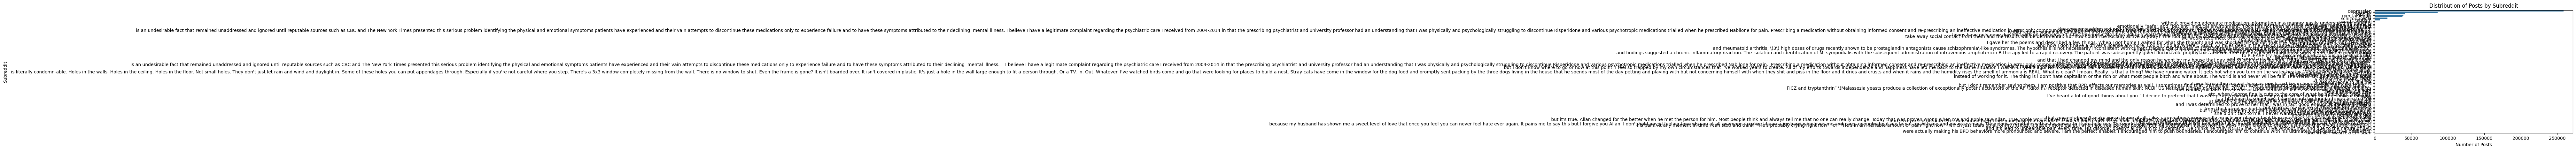

In [32]:
plt.figure(figsize=(8, 5))
sns.countplot(y='Subreddit', data=df, order=df['Subreddit'].value_counts().index)
plt.title('Distribution of Posts by Subreddit')
plt.xlabel('Number of Posts')
plt.ylabel('Subreddit')
plt.tight_layout()
plt.show()

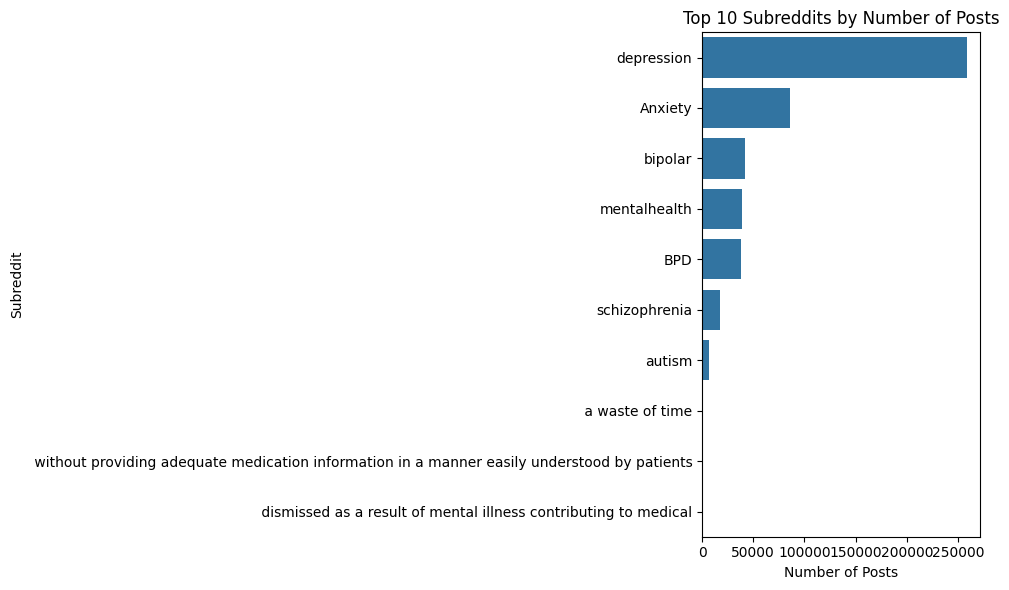

In [33]:
# Select top 10 subreddits by frequency
top_subreddits = df['Subreddit'].value_counts().nlargest(10).index

# Filter DataFrame
filtered_df = df[df['Subreddit'].isin(top_subreddits)]

# Plot
plt.figure(figsize=(10, 6))
sns.countplot(y='Subreddit', data=filtered_df, order=top_subreddits)
plt.title('Top 10 Subreddits by Number of Posts')
plt.xlabel('Number of Posts')
plt.ylabel('Subreddit')
plt.tight_layout()
plt.show()

In [34]:
# Define the valid subreddits you want to keep
valid_subreddits = ['depression', 'Anxiety', 'bipolar', 'mentalhealth', 'BPD', 'schizophrenia', 'autism']

# Replace all other subreddit values with NaN
df['Subreddit'] = df['Subreddit'].where(df['Subreddit'].isin(valid_subreddits))

# Drop rows where 'subreddit' is NaN (i.e., invalid or unwanted subreddits)
df.dropna(subset=['Subreddit'], inplace=True)
df.isnull().values.any()

/tmp/ipython-input-901992291.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Subreddit'] = df['Subreddit'].where(df['Subreddit'].isin(valid_subreddits))
/tmp/ipython-input-901992291.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['Subreddit'], inplace=True)


False

In [35]:
df.reset_index(drop=True, inplace=True)
print("SHAPE AFTER CLEANING: ", df.shape)

SHAPE AFTER CLEANING:  (488290, 4)


In [36]:
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict

In [37]:
def simple_clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [38]:
import numpy as np

top_words_per_class = defaultdict(list)
vectorizer = CountVectorizer(max_features=1000)
for sub in df['Subreddit'].unique():
    texts = df[df['Subreddit'] == sub]['Combined']
    X = vectorizer.fit_transform(texts)
    word_freq = np.asarray(X.sum(axis=0)).flatten()
    vocab = vectorizer.get_feature_names_out()
    freq_dict = dict(zip(vocab, word_freq))
    sorted_words = sorted(freq_dict.items(), key=lambda x: x[1], reverse=True)[:10]
    top_words_per_class[sub] = sorted_words

In [39]:
top_words_per_class_df = pd.DataFrame({k: dict(v) for k, v in top_words_per_class.items()})
display(top_words_per_class_df)

,Anxiety,BPD,depression,autism,mentalhealth,bipolar,schizophrenia
im,175984.0,77657.0,572321.0,8736.0,91399.0,76890.0,25541.0
anxiety,134971.0,NaN,NaN,NaN,NaN,NaN,NaN
like,108884.0,55336.0,357849.0,6944.0,64663.0,42270.0,17842.0
feel,95581.0,48372.0,347381.0,NaN,55272.0,34966.0,11124.0
get,76372.0,28694.0,215583.0,4726.0,39487.0,26855.0,9677.0
dont,74699.0,39915.0,348088.0,4837.0,53528.0,30728.0,12483.0
ive,70119.0,27623.0,208386.0,NaN,37206.0,30047.0,8927.0
time,65522.0,29001.0,203922.0,3930.0,38434.0,26461.0,9591.0
know,65359.0,35717.0,236562.0,4814.0,43139.0,26539.0,11030.0
really,54580.0,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
print(df.head())

                                               Title  \
0                            exposure does not work!   
1  Panic attack? derealization? can't go to docto...   
2                 How long can a panic attack last?!   
3                                    Stepping stones   
4  Coping with anxiety over climate change, on th...   

                                                Text Subreddit  \
0  I have struggled with social anxiety from chil...   Anxiety   
1  Back in March (I know, a while ago D:), I woke...   Anxiety   
2  I've been withdrawing from medicines lately (e...   Anxiety   
3  First time poster, long time lurker.   I've ha...   Anxiety   
4  Hi all,  I made a throwaway account as my main...   Anxiety   

                                            Combined  
0  exposure work struggled social anxiety childho...  
1  panic attack derealization cant go doctor advi...  
2  long panic attack last ive withdrawing medicin...  
3  stepping stone first time poster long time 

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

vectorizer = TfidfVectorizer(max_features=5000)

In [42]:
# Drop classes with fewer than 2 samples
min_samples = 2
class_counts = df['Subreddit'].value_counts()
valid_classes = class_counts[class_counts >= min_samples].index
df = df[df['Subreddit'].isin(valid_classes)]

# Recreate features after filtering
X = vectorizer.fit_transform(df['Combined'])
y = df['Subreddit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
print(y.value_counts())

Subreddit
depression       258392
Anxiety           86228
bipolar           41477
mentalhealth      39369
BPD               38191
schizophrenia     17492
autism             7141
Name: count, dtype: int64


In [43]:
print("Train Set Class Distribution:\n", y_train.value_counts(normalize=True))
print("\nTest Set Class Distribution:\n", y_test.value_counts(normalize=True))

Train Set Class Distribution:
 Subreddit
depression       0.529176
Anxiety          0.176591
bipolar          0.084944
mentalhealth     0.080626
BPD              0.078214
schizophrenia    0.035824
autism           0.014625
Name: proportion, dtype: float64

Test Set Class Distribution:
 Subreddit
depression       0.529183
Anxiety          0.176596
bipolar          0.084939
mentalhealth     0.080628
BPD              0.078212
schizophrenia    0.035819
autism           0.014622
Name: proportion, dtype: float64


In [44]:
# Clean reinstall to avoid ABI mismatches
!pip uninstall -y gensim numpy scipy --quiet
!pip install --no-cache-dir numpy==1.26.4 scipy==1.11.4 gensim==4.3.2 pandas pyarrow scikit-learn --quiet

import numpy, scipy, gensim, pandas
print("NumPy:", numpy.__version__)
print("SciPy:", scipy.__version__)
print("gensim:", gensim.__version__)
print("pandas:", pandas.__version__)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 149.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 252.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.3/23.3 MB 137.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 146.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.8/35.8 MB 65.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version 

In [45]:
import os, glob, textwrap

PROJECT_DIR = "/content"
OUTPUT_DIR = f"{PROJECT_DIR}/w2v_outputs"
os.makedirs(OUTPUT_DIR, exist_ok=True)

CANDIDATES = [
    f"{PROJECT_DIR}/MENTAL HEALTH.csv",
    f"{PROJECT_DIR}/MENTAL_HEALTH.csv",
    f"{PROJECT_DIR}/MENTAL HEALTH",
    f"{PROJECT_DIR}/MENTAL_HEALTH",
    f"{PROJECT_DIR}/MENTAL HEALTH.tsv",
    f"{PROJECT_DIR}/MENTAL_HEALTH.tsv",
]

DATA_PATH = None
for c in CANDIDATES:
    if os.path.exists(c):
        DATA_PATH = c
        break

if DATA_PATH is None:
    any_mental = sorted(glob.glob(f"{PROJECT_DIR}/MENTAL*"))
    if any_mental:
        DATA_PATH = any_mental[0]

if DATA_PATH is None:
    raise FileNotFoundError(textwrap.dedent(f"""
        Could not find your dataset. Place it in {PROJECT_DIR} and name it 'MENTAL HEALTH' (with or without .csv/.tsv).
    """).strip())

print("DATA_PATH:", DATA_PATH)
print("OUTPUT_DIR:", OUTPUT_DIR)


DATA_PATH: /content/MENTAL HEALTH.csv
OUTPUT_DIR: /content/w2v_outputs


In [46]:
import pandas as pd

def robust_read_tabular(path):
    if path.lower().endswith(".tsv"):
        return pd.read_csv(path, sep="\t", on_bad_lines="skip", encoding_errors="ignore")
    try:
        return pd.read_csv(path, sep=None, engine="python", on_bad_lines="skip", encoding_errors="ignore")
    except Exception:
        return pd.read_csv(path, on_bad_lines="skip", encoding_errors="ignore")

df = robust_read_tabular(DATA_PATH)

# drop Unnamed + all-empty cols
df.columns = df.columns.map(lambda x: str(x).strip())
df = df.loc[:, ~df.columns.str.match(r"(?i)^Unnamed")]
df = df.loc[:, ~df.isna().all(axis=0)]

print(f"[Clean] Columns left: {list(df.columns)}")

TEXT_COL_PREFERENCE = ["Combined", "Text"]
TITLE_COL_CANDIDATES = ["Title"]
SUBREDDIT_COL = "Subreddit"

def pick_text_series(df):
    for col in TEXT_COL_PREFERENCE:
        if col in df.columns:
            print(f"[Info] Using column '{col}' for text.")
            return df[col].astype(str)

    title = next((c for c in TITLE_COL_CANDIDATES if c in df.columns), None)
    text  = next((c for c in TEXT_COL_PREFERENCE if c in df.columns), None)
    if title and text:
        return (df[title].astype(str).fillna("") + " " + df[text].astype(str).fillna("")).str.strip()

    object_cols = [c for c in df.columns if df[c].dtype == "object"]
    if not object_cols:
        raise ValueError("No text-like columns found.")
    best = max(object_cols, key=lambda c: df[c].astype(str).str.len().sum())
    print(f"[Info] Fallback to '{best}'")
    return df[best].astype(str)

texts = pick_text_series(df).fillna("").astype(str)
print(f"[Info] Loaded {len(texts):,} rows.")
df.head(3)


[Clean] Columns left: ['Title', 'Text', 'Subreddit']
[Info] Using column 'Text' for text.
[Info] Loaded 488,738 rows.


,Title,Text,Subreddit
0,exposure does not work!,I have struggled with social anxiety from chil...,Anxiety
1,Panic attack? derealization? can't go to docto...,"Back in March (I know, a while ago D:), I woke...",Anxiety
2,How long can a panic attack last?!,I've been withdrawing from medicines lately (e...,Anxiety


In [47]:
from gensim.utils import simple_preprocess
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

def clean_text_to_tokens(text):
    toks = simple_preprocess(str(text), deacc=True, min_len=2, max_len=30)
    return [t for t in toks if t not in ENGLISH_STOP_WORDS and not t.isdigit()]

class SentenceStream:
    def __init__(self, series): self.series = series
    def __iter__(self):
        for t in self.series:
            yield clean_text_to_tokens(t)

sentences = SentenceStream(texts)

first_example = next(iter(SentenceStream(texts)), [])
print("[Info] Tokenization ready. Example:", first_example[:25])


[Info] Tokenization ready. Example: ['struggled', 'social', 'anxiety', 'childhood', 'main', 'advice', 'friends', 'self', 'help', 'books', 'professionals', 'expose', 'environments', 'better', 'example', 'anxious', 'single', 'time', 'shop', 'doing', 'shopping', 'daily', 'weekly', 'nervous', 'sweaty']


In [48]:
USE_PHRASES = False
phraser = None
# sentences already defined from Cell 4
print("[Info] Using raw tokens only (no bigrams/trigrams).")


[Info] Using raw tokens only (no bigrams/trigrams).


In [51]:
from gensim.models import Word2Vec
import os, time


VECTOR_SIZE = 150     # smaller embedding dim (faster)
WINDOW = 4            # context window
MIN_COUNT = 10        # ignore rare words
SG = 0                # CBOW (faster than skip-gram)
NEGATIVE = 5          # fewer negative samples
EPOCHS = 5            # reduce passes
SAMPLE = 1e-5         # subsample frequent words
WORKERS = max(1, os.cpu_count() or 2)  # all CPU threads
BATCH_WORDS = 50000   # larger batches improve throughput
RANDOM_SEED = 42

print(f"[Info] Training Word2Vec (fast mode, {WORKERS} threads)...")
t0 = time.time()
w2v = Word2Vec(
    sentences=sentences,   # your streaming token iterator
    vector_size=VECTOR_SIZE,
    window=WINDOW,
    min_count=MIN_COUNT,
    workers=WORKERS,
    sg=SG,
    negative=NEGATIVE,
    sample=SAMPLE,
    epochs=EPOCHS,
    seed=RANDOM_SEED,
    batch_words=BATCH_WORDS,
    hs=0,
    compute_loss=False,
)
t1 = time.time()
print(f"[Info] Training complete. Vocab size: {len(w2v.wv):,}. Time: {(t1 - t0):.1f}s")


[Info] Training Word2Vec (fast mode, 12 threads)...
[Info] Training complete. Vocab size: 34,116. Time: 929.4s


In [52]:
import pandas as pd

os.makedirs(OUTPUT_DIR, exist_ok=True)
w2v.save(f"{OUTPUT_DIR}/word2vec.model")
w2v.wv.save(f"{OUTPUT_DIR}/word2vec.kv")

pd.Series(list(w2v.wv.key_to_index.keys())).to_csv(
    f"{OUTPUT_DIR}/vocab.tsv", sep="\t", index=False, header=False
)

print("[Info] Model, KeyedVectors, and vocab saved in", OUTPUT_DIR)


[Info] Model, KeyedVectors, and vocab saved in /content/w2v_outputs


In [53]:
import json

examples = ["anxiety", "depression", "therapy", "stress", "help"]
similars = {w: w2v.wv.most_similar(w, topn=10) for w in examples if w in w2v.wv}

with open(f"{OUTPUT_DIR}/most_similar.json", "w") as f:
    json.dump(similars, f, indent=2)

print("[Info] Wrote most_similar.json with example neighbors")
similars


[Info] Wrote most_similar.json with example neighbors


{'anxiety': [('debilitating', 0.7931821942329407),
  ('severe', 0.7862333059310913),
  ('generalized', 0.7744218707084656),
  ('agoraphobic', 0.770760715007782),
  ('crippling', 0.7614251971244812),
  ('attacks', 0.7606682777404785),
  ('depression', 0.7585502862930298),
  ('worsening', 0.7555983066558838),
  ('bouts', 0.7448965311050415),
  ('gad', 0.7402398586273193)],
 'depression': [('depressions', 0.8553224205970764),
  ('battling', 0.82513827085495),
  ('battled', 0.8101833462715149),
  ('clinically', 0.8082717657089233),
  ('gad', 0.8004993200302124),
  ('generalized', 0.7971683740615845),
  ('situational', 0.7920715808868408),
  ('relapses', 0.7831169366836548),
  ('severe', 0.7820688486099243),
  ('bouts', 0.7738832831382751)],
 'therapy': [('therapist', 0.918816089630127),
  ('sessions', 0.9045271873474121),
  ('counseling', 0.9041812419891357),
  ('counselling', 0.8988062143325806),
  ('therapists', 0.891501784324646),
  ('dbt', 0.8794888854026794),
  ('psychologist', 0.8480

In [54]:
import numpy as np

def average_vector(tokens, kv):
    vecs = [kv[t] for t in tokens if t in kv]
    return np.mean(vecs, axis=0) if vecs else np.zeros(kv.vector_size, dtype="float32")

n_docs, dim = len(texts), w2v.wv.vector_size
doc_mm = np.memmap(f"{OUTPUT_DIR}/doc_avg_vectors.npy", dtype="float32", mode="w+", shape=(n_docs, dim))

for idx, sent in enumerate(SentenceStream(texts)):  # reuse your streaming iterator
    doc_mm[idx, :] = average_vector(sent, w2v.wv)
    if idx % 50000 == 0 and idx > 0:
        print(f"[Info] {idx:,}/{n_docs:,} docs processed")

doc_mm.flush()
print("[Info] Saved doc_avg_vectors.npy with shape", doc_mm.shape)


[Info] 50,000/488,738 docs processed
[Info] 100,000/488,738 docs processed
[Info] 150,000/488,738 docs processed
[Info] 200,000/488,738 docs processed
[Info] 250,000/488,738 docs processed
[Info] 300,000/488,738 docs processed
[Info] 350,000/488,738 docs processed
[Info] 400,000/488,738 docs processed
[Info] 450,000/488,738 docs processed
[Info] Saved doc_avg_vectors.npy with shape (488738, 150)


In [55]:
from gensim.models import KeyedVectors
kv = KeyedVectors.load(f"{OUTPUT_DIR}/word2vec.kv", mmap='r')

def safe_sim(a, b):
    return kv.similarity(a, b) if (a in kv and b in kv) else "n/a"

print("therapy ~ counseling:", safe_sim("therapy", "counseling"))
print(kv.most_similar("anxiety", topn=10) if "anxiety" in kv else "anxiety not in vocab")


therapy ~ counseling: 0.9041813
[('debilitating', 0.7931821942329407), ('severe', 0.7862333059310913), ('generalized', 0.7744218707084656), ('agoraphobic', 0.770760715007782), ('crippling', 0.7614251971244812), ('attacks', 0.7606682777404785), ('depression', 0.7585502862930298), ('worsening', 0.7555983066558838), ('bouts', 0.7448965311050415), ('gad', 0.7402398586273193)]


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.001s...
[t-SNE] Computed neighbors for 1000 samples in 0.281s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 1.475810
[t-SNE] KL divergence after 250 iterations with early exaggeration: 73.086594
[t-SNE] KL divergence after 1000 iterations: 1.440721


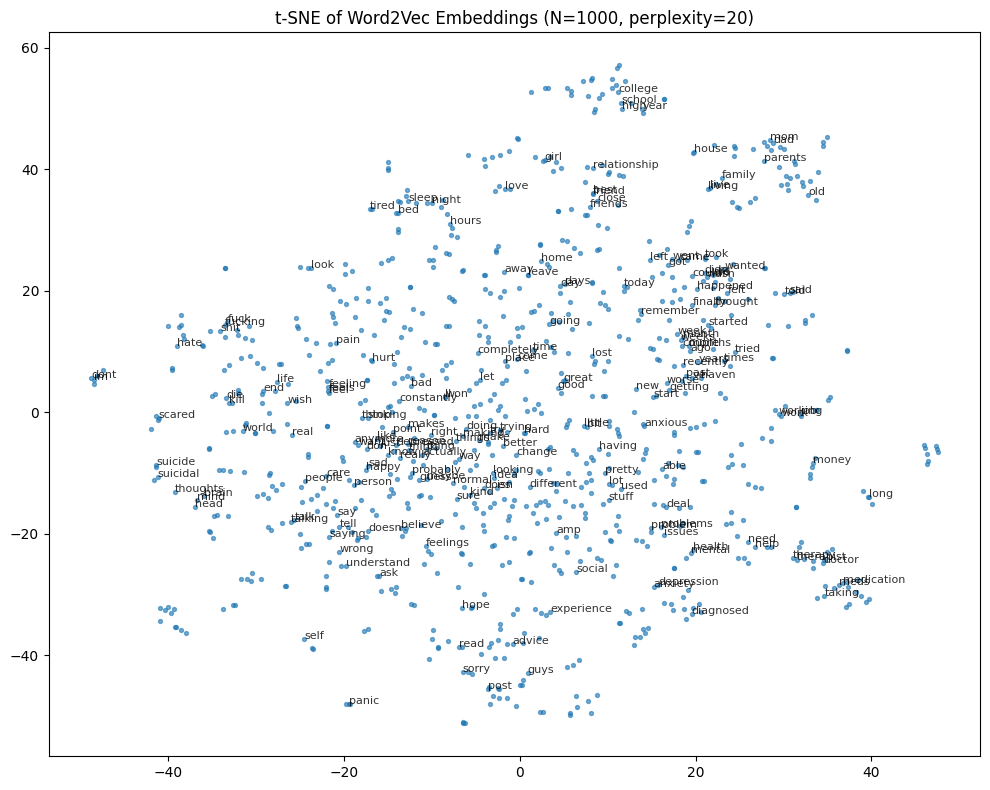

[Info] Saved t-SNE plot to /content/w2v_outputs/tsne_words.png


In [59]:
# t-SNE visualization of word embeddings
import os
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# ----- Config -----
TOP_N = 1000          # how many words to plot (increase/decrease as needed)
LABEL_TOP_K = 200     # how many of those to label
RANDOM_SEED = 42

# Rank vocab by frequency (gensim 4.x keeps key_to_index roughly by freq)
vocab = list(w2v.wv.key_to_index.keys())
if len(vocab) > TOP_N:
    vocab = vocab[:TOP_N]

# Safe attempt to sort by actual counts if available
try:
    vocab = sorted(vocab, key=lambda w: w2v.wv.get_vecattr(w, "count"), reverse=True)[:TOP_N]
except Exception:
    vocab = vocab[:TOP_N]

X = np.vstack([w2v.wv[w] for w in vocab])

# Choose a decent perplexity given N
perp = max(5, min(50, len(vocab)//50 or 5))

tsne = TSNE(
    n_components=2,
    perplexity=perp,
    init="pca",
    learning_rate="auto",
    random_state=RANDOM_SEED,
    n_iter=1000,
    verbose=1,
)
Y = tsne.fit_transform(X)

plt.figure(figsize=(10, 8))
plt.scatter(Y[:, 0], Y[:, 1], s=8, alpha=0.6)

# Label the most frequent K terms to avoid clutter
label_words = vocab[:min(LABEL_TOP_K, len(vocab))]
for w in label_words:
    i = vocab.index(w)
    plt.annotate(w, (Y[i, 0], Y[i, 1]), fontsize=8, alpha=0.8)

plt.title(f"t-SNE of Word2Vec Embeddings (N={len(vocab)}, perplexity={perp})")
out_path = os.path.join(OUTPUT_DIR, "tsne_words.png")
plt.tight_layout()
plt.savefig(out_path, dpi=150)
plt.show()

print(f"[Info] Saved t-SNE plot to {out_path}")


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP(angular_rp_forest=True, metric='cosine', n_jobs=1, random_state=42, verbose=True)
Wed Aug 20 15:00:29 2025 Construct fuzzy simplicial set
Wed Aug 20 15:00:32 2025 Finding Nearest Neighbors
Wed Aug 20 15:00:35 2025 Finished Nearest Neighbor Search
Wed Aug 20 15:00:38 2025 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Wed Aug 20 15:00:42 2025 Finished embedding


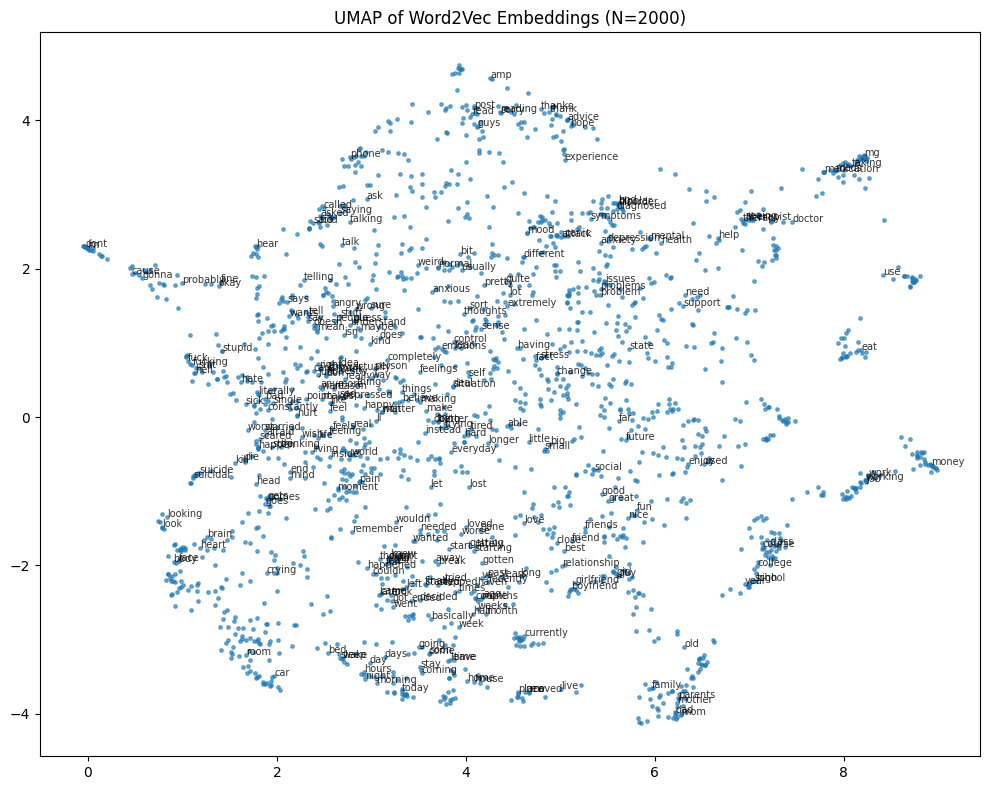

[Info] Saved UMAP plot to /content/w2v_outputs/umap_words.png


In [58]:
# If umap-learn is not installed, this will install it
try:
    import umap
except ImportError:
    !pip install --quiet umap-learn
    import umap

import os
import numpy as np
import matplotlib.pyplot as plt

# ----- Config -----
TOP_N = 2000          # UMAP can handle a bit more than t-SNE; adjust if slow
LABEL_TOP_K = 300
RANDOM_SEED = 42
N_NEIGHBORS = 15
MIN_DIST = 0.1

# Rank by frequency
vocab = list(w2v.wv.key_to_index.keys())
try:
    vocab = sorted(vocab, key=lambda w: w2v.wv.get_vecattr(w, "count"), reverse=True)[:TOP_N]
except Exception:
    vocab = vocab[:TOP_N]

X = np.vstack([w2v.wv[w] for w in vocab])

reducer = umap.UMAP(
    n_components=2,
    n_neighbors=N_NEIGHBORS,
    min_dist=MIN_DIST,
    metric="cosine",
    random_state=RANDOM_SEED,
    verbose=True,
)
Y = reducer.fit_transform(X)

plt.figure(figsize=(10, 8))
plt.scatter(Y[:, 0], Y[:, 1], s=6, alpha=0.6)

# Label the top frequent K points
label_words = vocab[:min(LABEL_TOP_K, len(vocab))]
for w in label_words:
    i = vocab.index(w)
    plt.annotate(w, (Y[i, 0], Y[i, 1]), fontsize=7, alpha=0.8)

plt.title(f"UMAP of Word2Vec Embeddings (N={len(vocab)})")
out_path = os.path.join(OUTPUT_DIR, "umap_words.png")
plt.tight_layout()
plt.savefig(out_path, dpi=150)
plt.show()

print(f"[Info] Saved UMAP plot to {out_path}")
